<h2>Santander Customer Transaction Prediction</h2>
<br>
<h4>Background -</h4>
<p>At Santander, mission is to help people and businesses prosper. We are always looking
for ways to help our customers understand their financial health and identify which
products and services might help them achieve their monetary goals.
Our data science team is continually challenging our machine learning algorithms,
working with the global data science community to make sure we can more accurately
identify new ways to solve our most common challenge, binary classification problems
such as: is a customer satisfied? Will a customer buy this product? Can a customer pay
this loan?
</p>
<h4>Problem Statement -</h4>
<p>In this challenge, we need to identify which customers will make a  transaction in
the future, irrespective of the amount of money transacted.<p>
<p>You are provided with an anonymized dataset containing numeric feature variables, the
binary target column, and a string ID_code column. The task is to predict the value
of target column in the test set.<p>

<h4> As from the problem statement it is confirmed that the problem that we are going to solve is binary classification problem</h4>
<p>In this problem we have to predict target variable which is 0 or 1?</p>

In [1]:
#importing all the libraries 
import pandas as pd #for dataframe manipulation
import seaborn as sns #written on top of matplotlib for data visualization
import numpy as np #for Numerical computing
import random
from math import radians, cos, sin, asin, sqrt 
from sklearn.model_selection import train_test_split,GridSearchCV #fo gridsearch and train-test split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt #for visualization

sns.set()
random.seed(113)
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
#slearn for machine learning algorithms
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import NearMiss #for performing under-sampling based on NearMiss methods.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint 
from sklearn.ensemble import RandomForestClassifier

<h3>Data Collection</h3>

In [2]:
##reading data
df_train =  pd.read_csv("train.csv");

In [3]:
#let us get some insights of data
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


<h3>Data Exploration and visualisation</h3>

In [4]:
print(df_train.shape) #Let us check the shape of dataset

(200000, 202)


In [5]:
"""
We have 200000 rows and 202 columns in dataset
"""
#Let us have some information about the dataframe like null values and types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
##checking for missing values
df_train.count()

ID_code    200000
target     200000
var_0      200000
var_1      200000
var_2      200000
var_3      200000
var_4      200000
var_5      200000
var_6      200000
var_7      200000
var_8      200000
var_9      200000
var_10     200000
var_11     200000
var_12     200000
var_13     200000
var_14     200000
var_15     200000
var_16     200000
var_17     200000
var_18     200000
var_19     200000
var_20     200000
var_21     200000
var_22     200000
var_23     200000
var_24     200000
var_25     200000
var_26     200000
var_27     200000
            ...  
var_170    200000
var_171    200000
var_172    200000
var_173    200000
var_174    200000
var_175    200000
var_176    200000
var_177    200000
var_178    200000
var_179    200000
var_180    200000
var_181    200000
var_182    200000
var_183    200000
var_184    200000
var_185    200000
var_186    200000
var_187    200000
var_188    200000
var_189    200000
var_190    200000
var_191    200000
var_192    200000
var_193    200000
var_194   

In [7]:
df_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

<h4>Now we will check for missing values </h4>

In [8]:
 #checking for null values in all the fields if any
df_train.isnull().values.any()

False


As we can see we don't have any null values

In [9]:
#Dropping target and ID_code to plot the histograms
df_train_custom = df_train.drop(["target","ID_code"],axis=1)

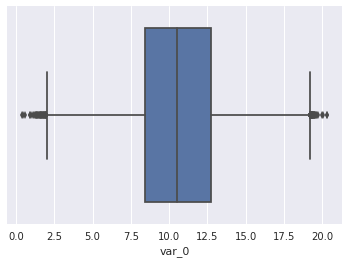

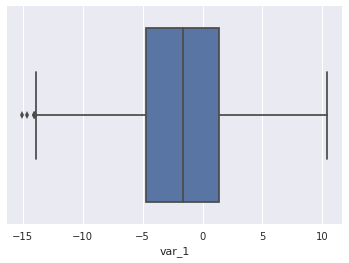

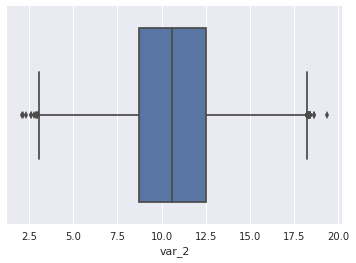

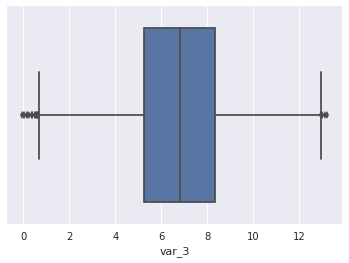

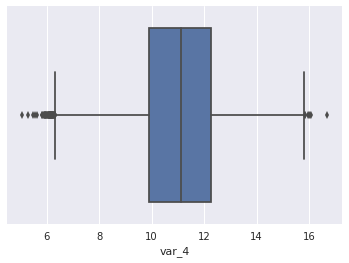

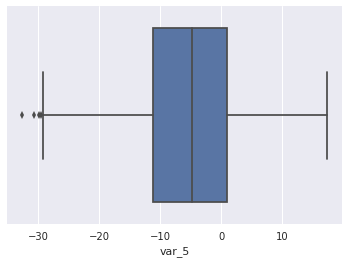

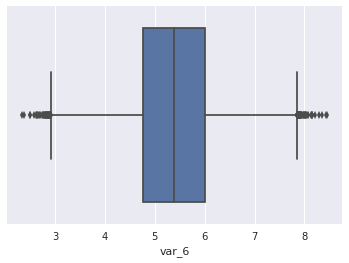

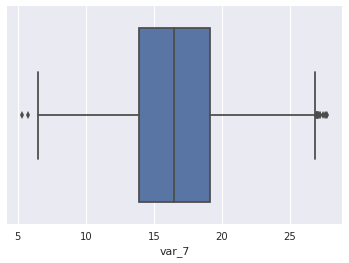

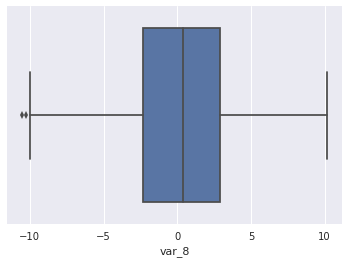

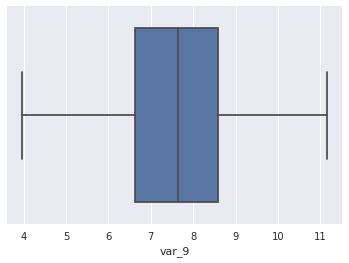

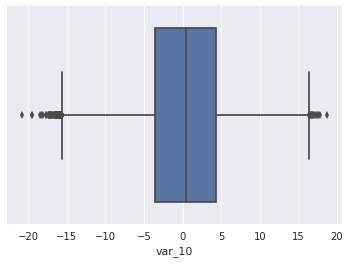

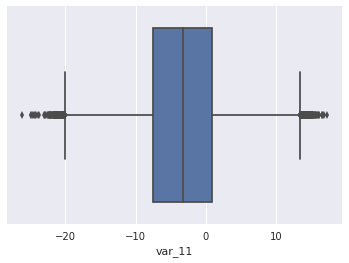

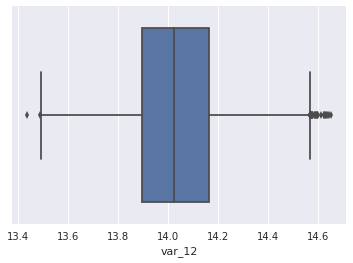

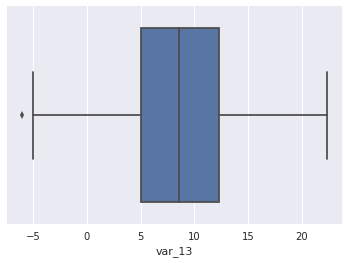

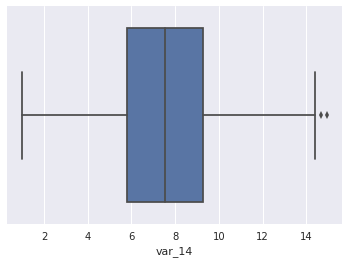

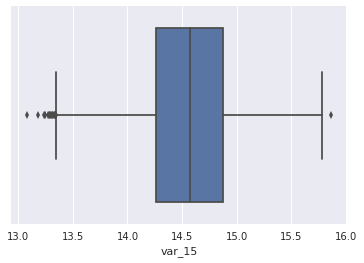

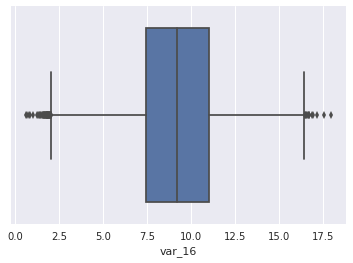

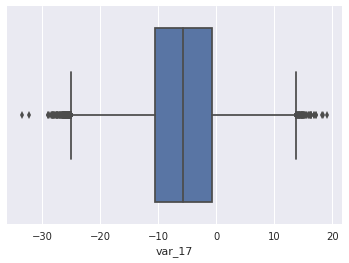

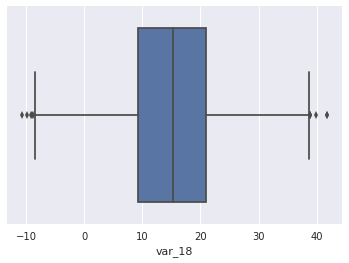

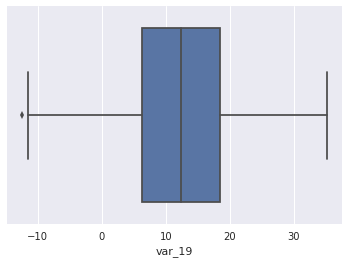

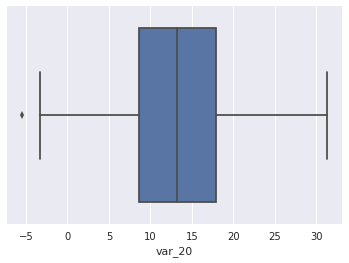

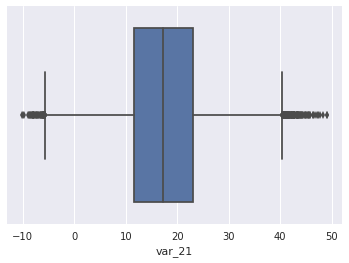

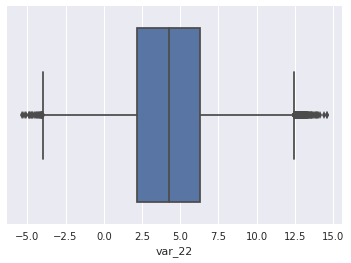

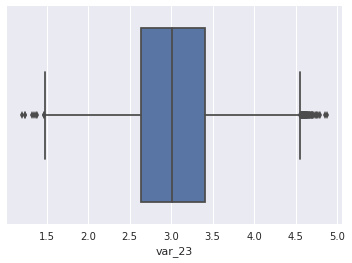

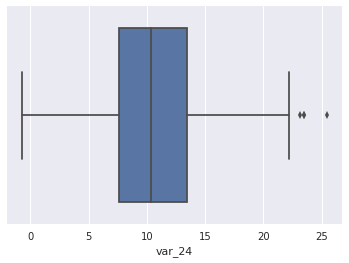

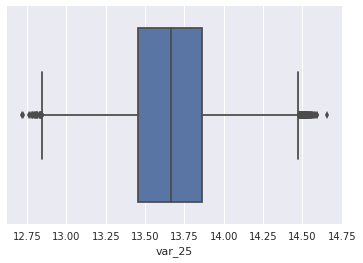

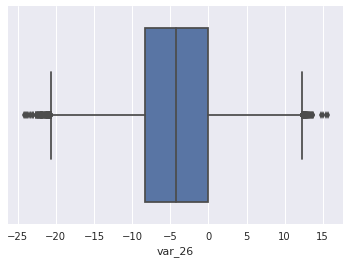

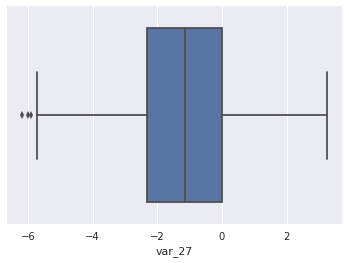

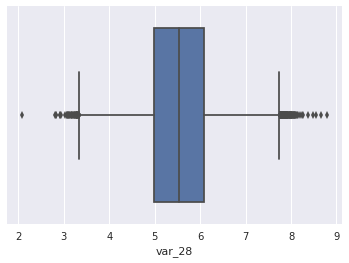

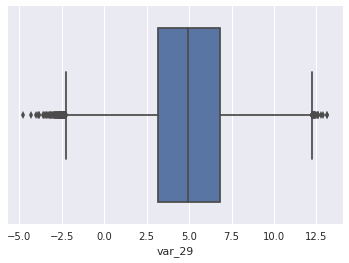

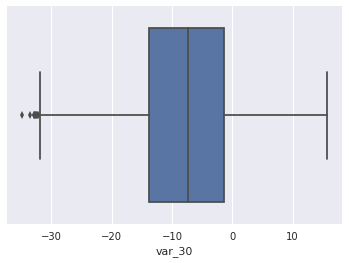

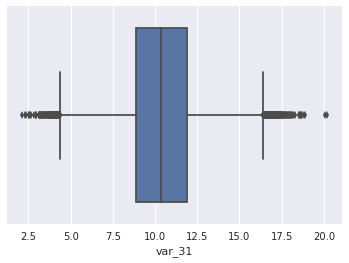

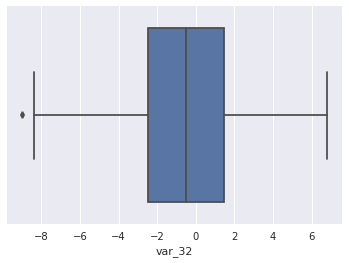

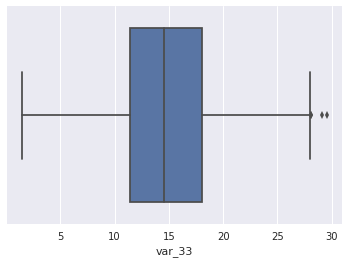

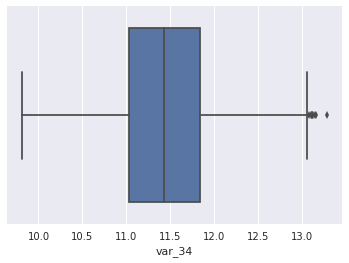

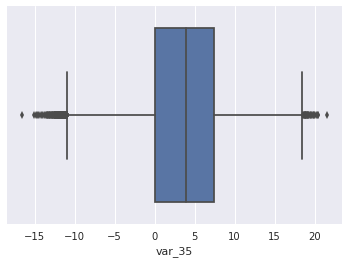

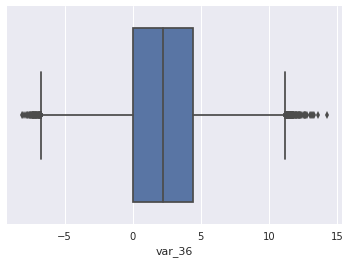

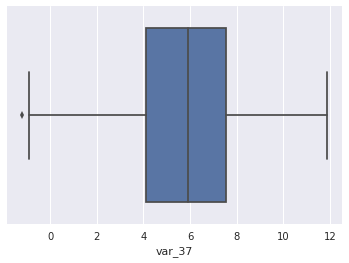

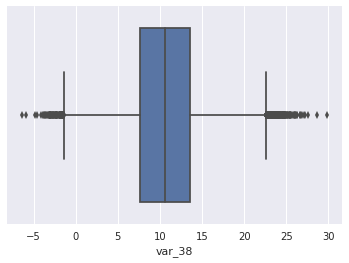

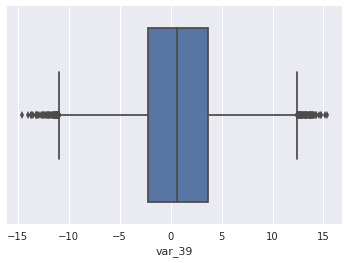

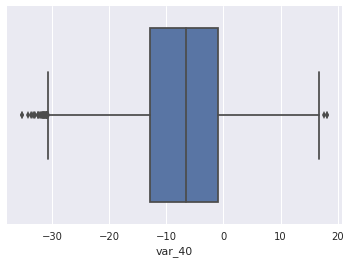

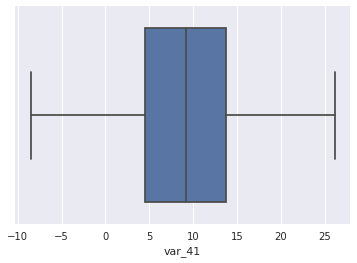

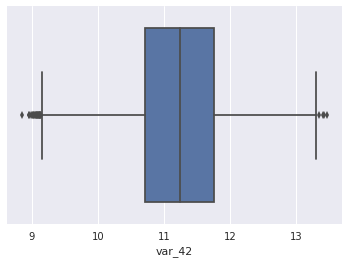

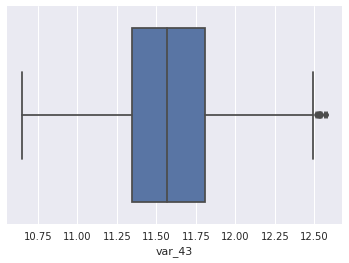

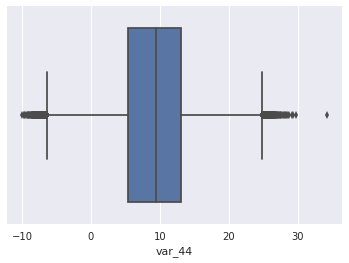

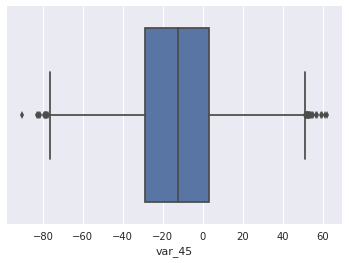

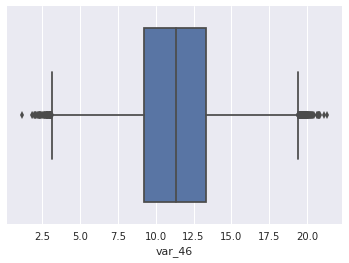

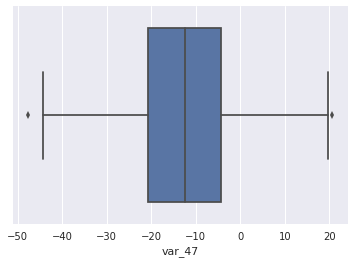

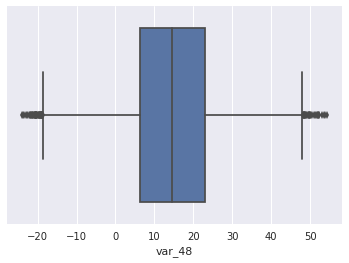

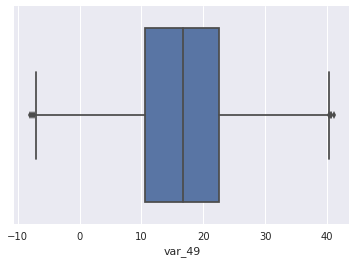

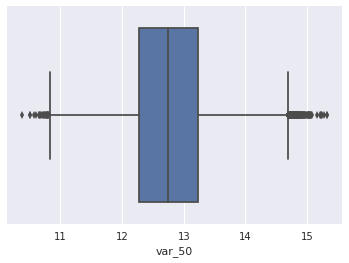

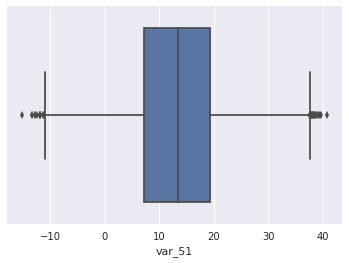

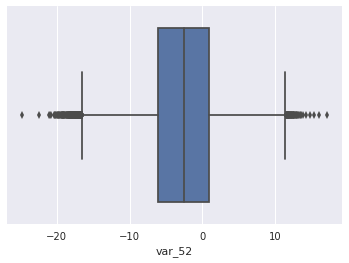

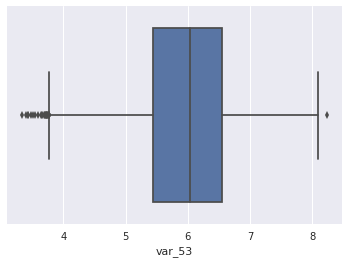

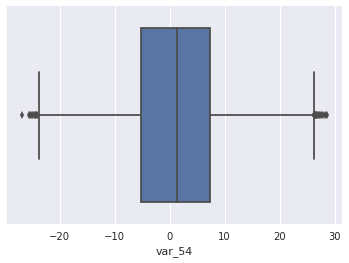

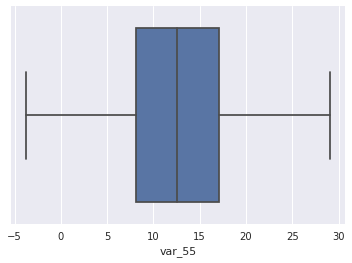

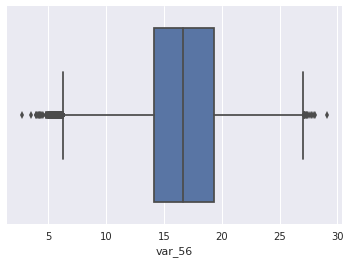

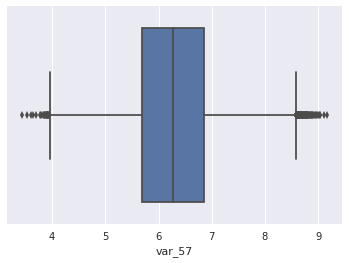

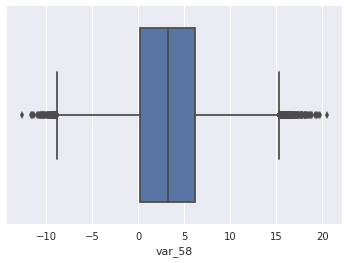

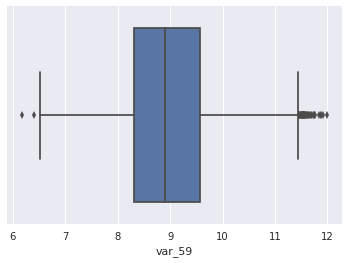

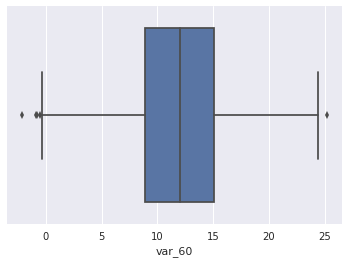

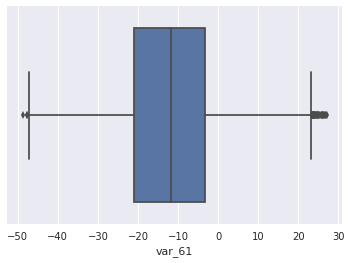

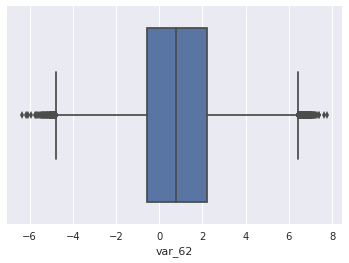

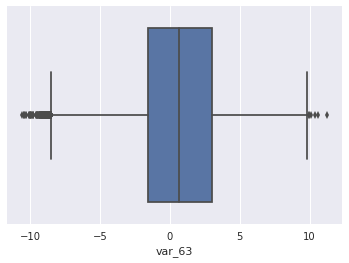

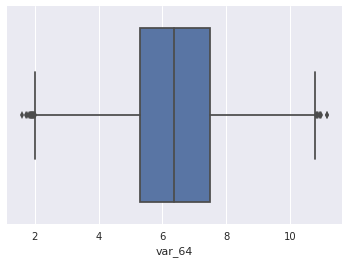

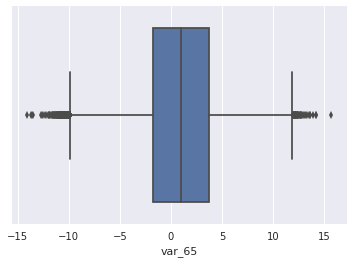

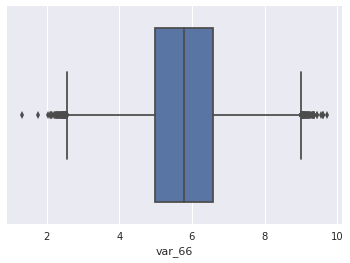

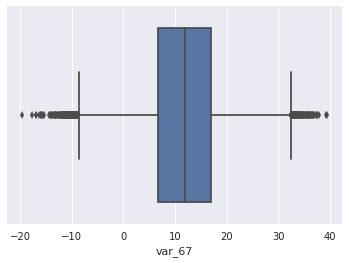

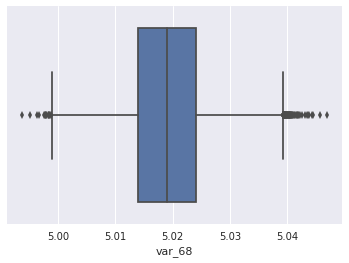

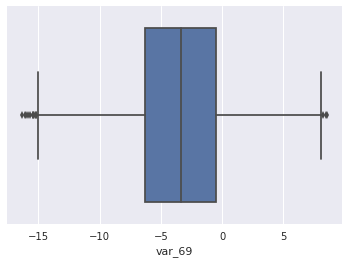

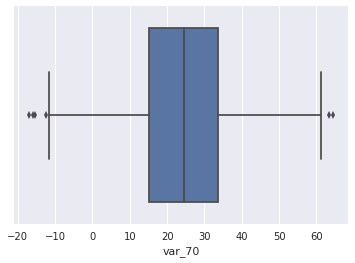

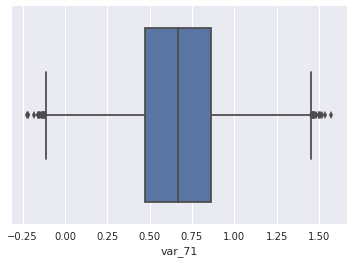

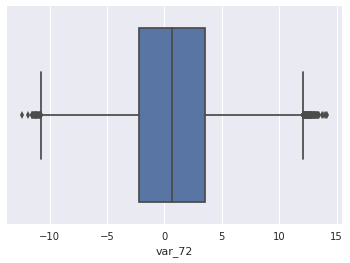

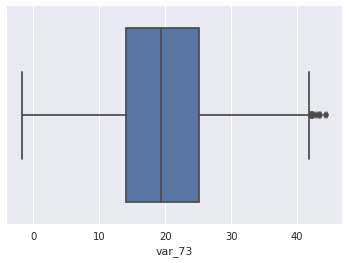

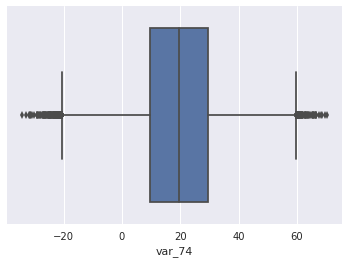

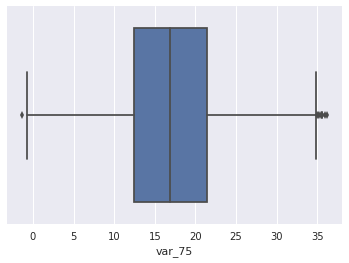

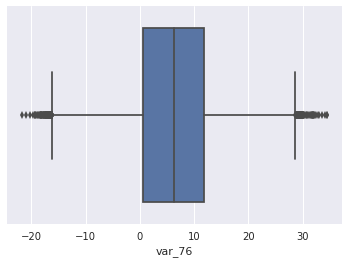

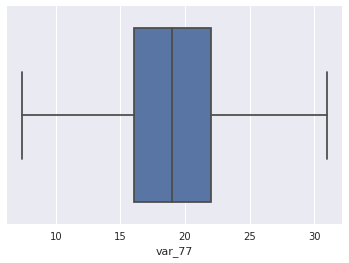

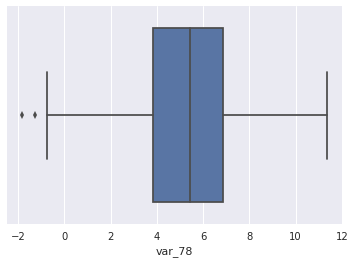

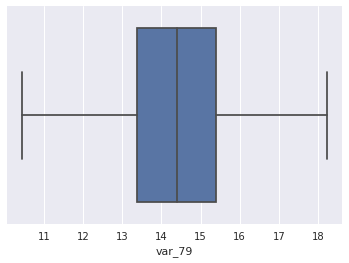

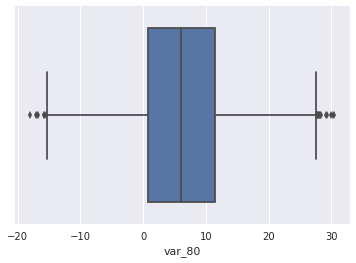

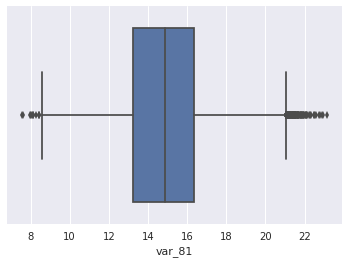

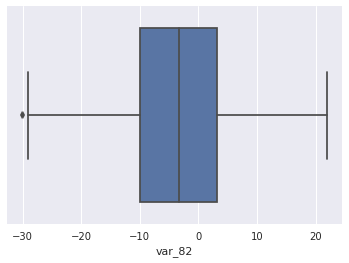

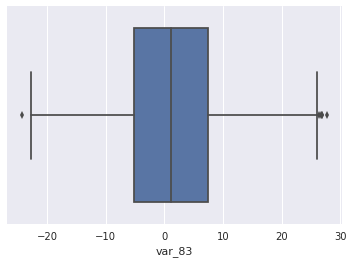

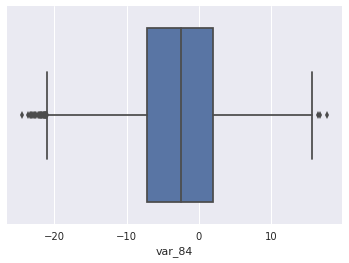

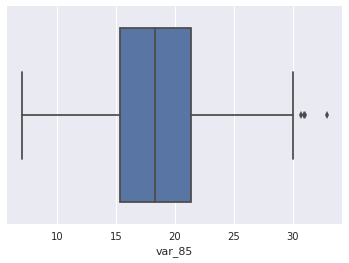

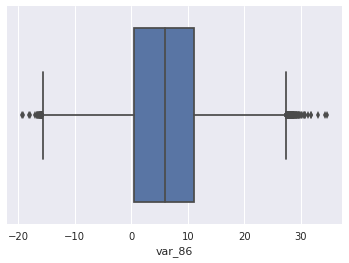

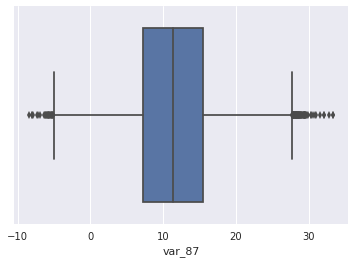

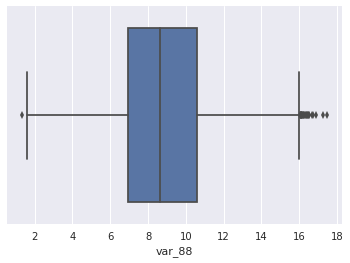

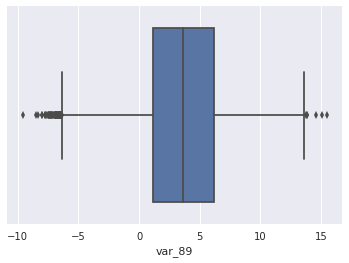

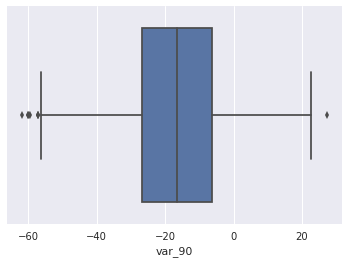

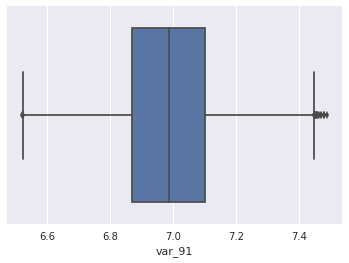

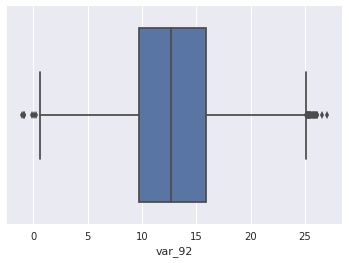

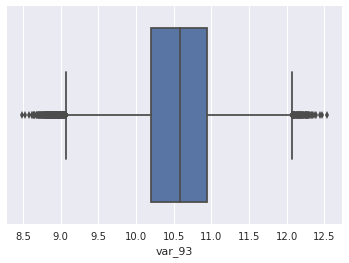

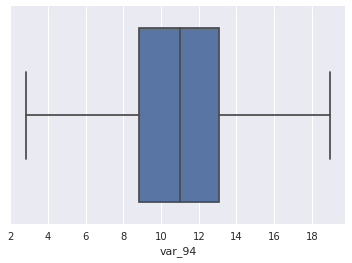

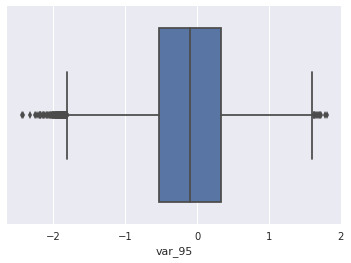

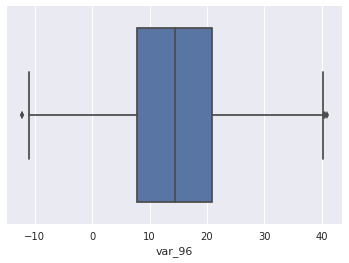

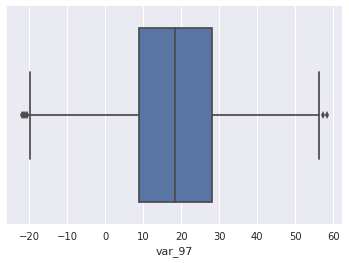

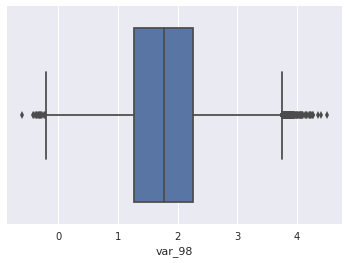

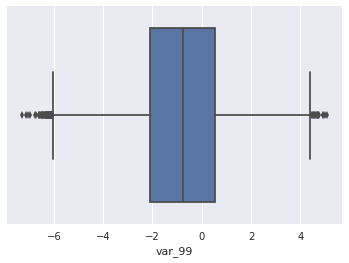

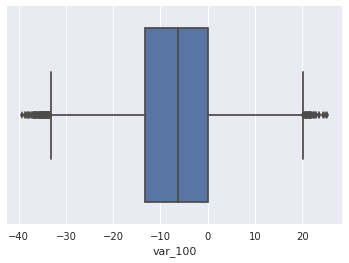

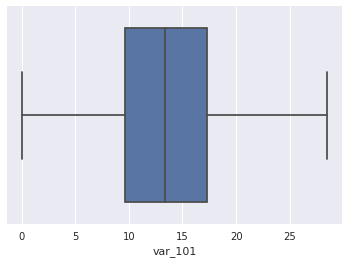

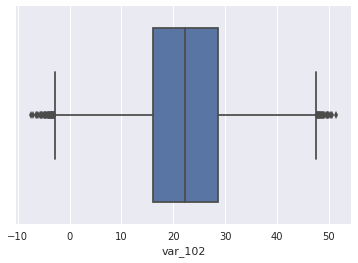

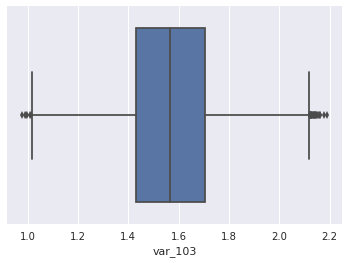

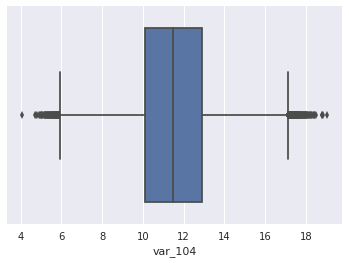

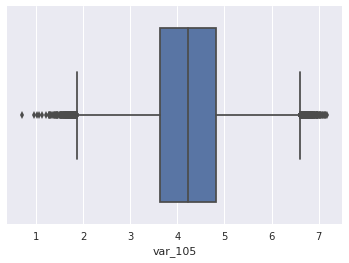

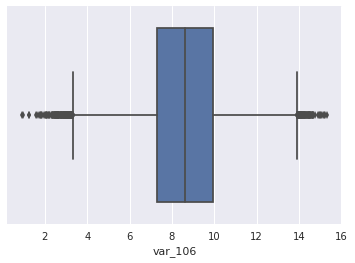

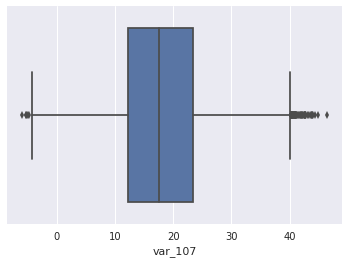

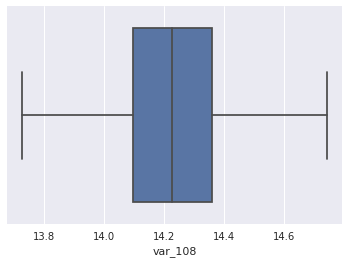

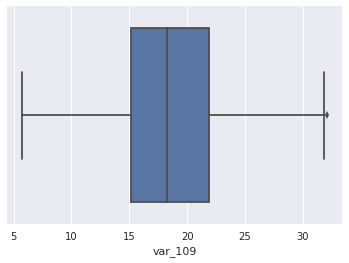

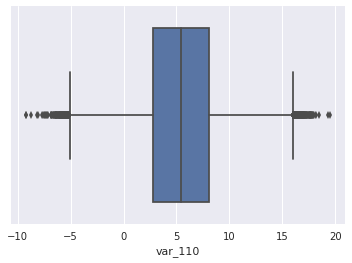

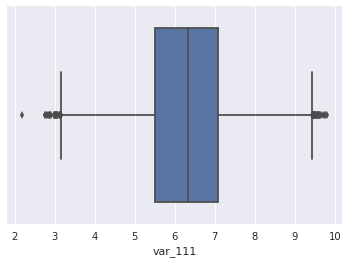

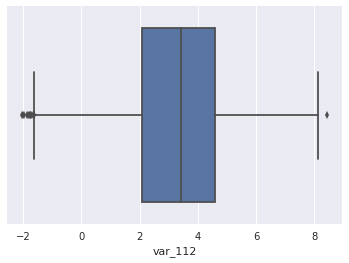

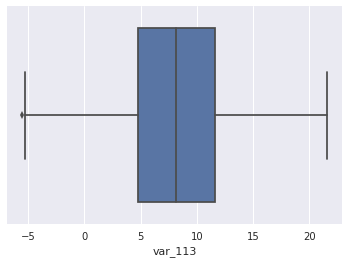

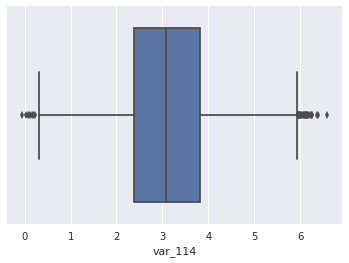

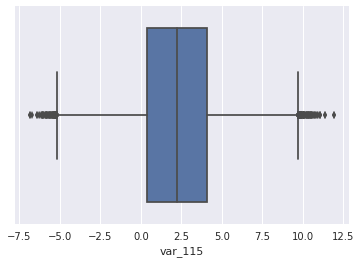

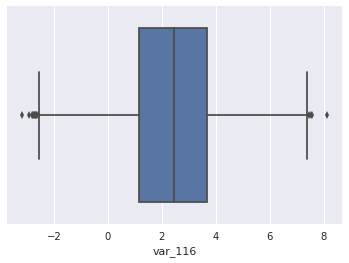

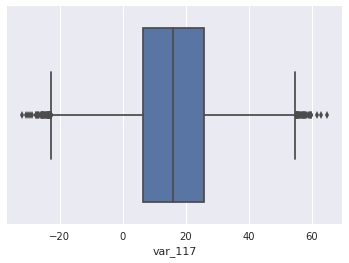

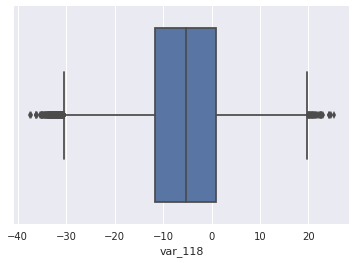

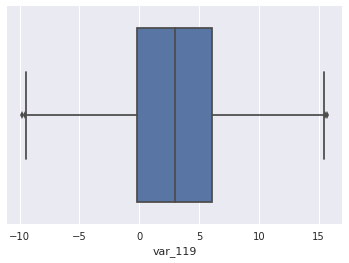

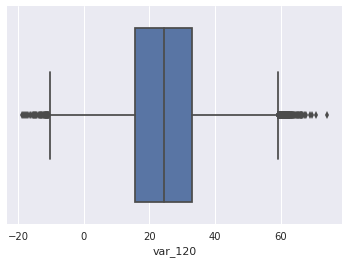

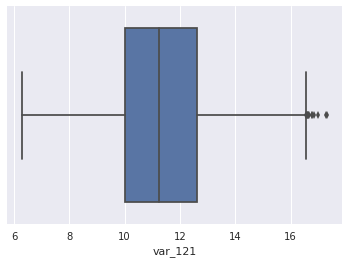

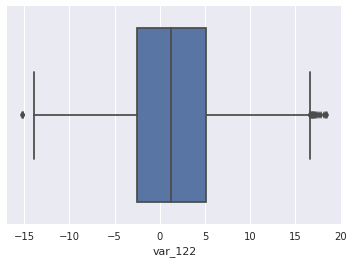

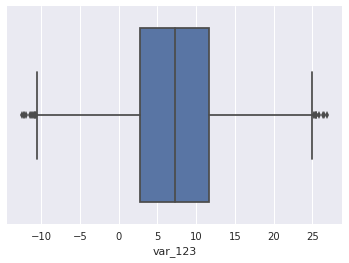

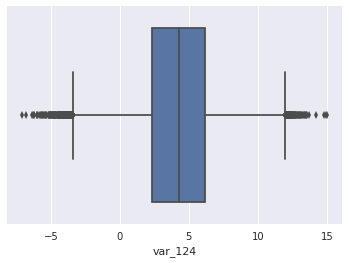

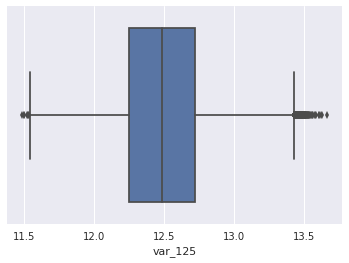

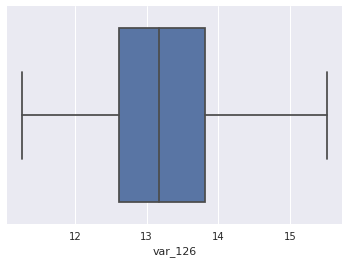

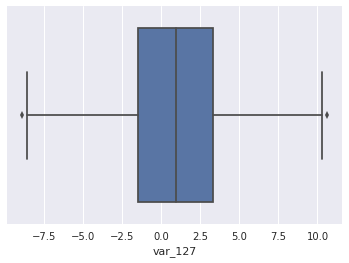

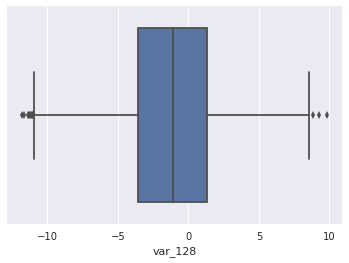

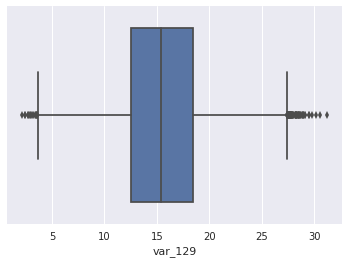

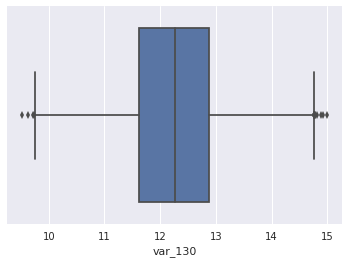

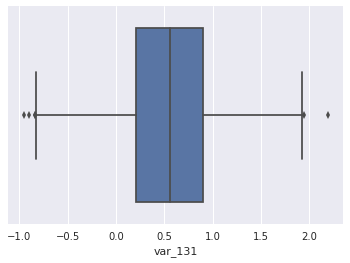

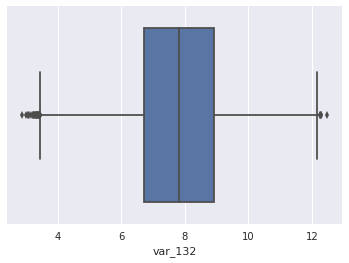

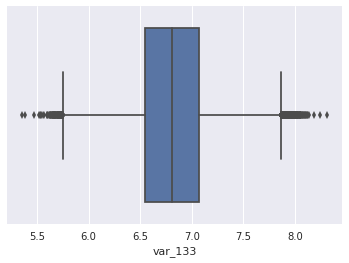

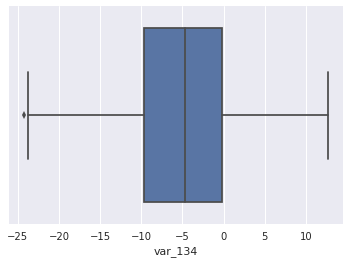

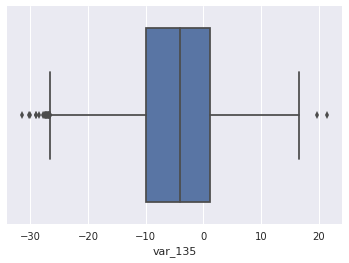

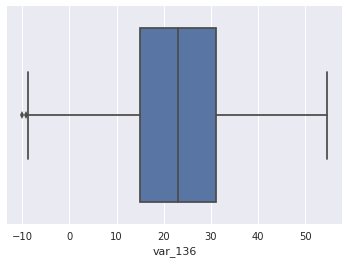

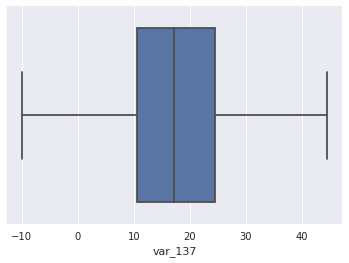

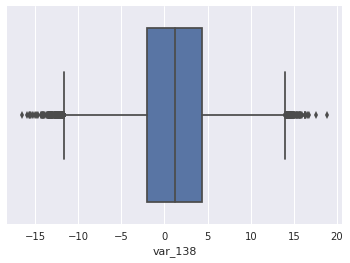

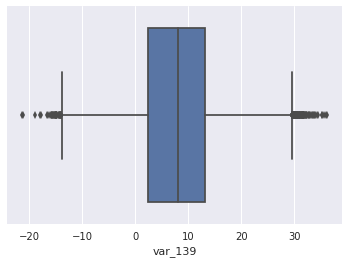

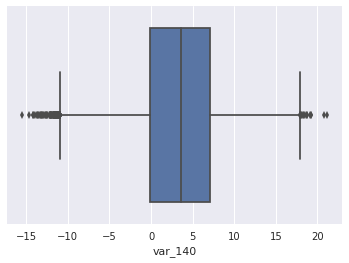

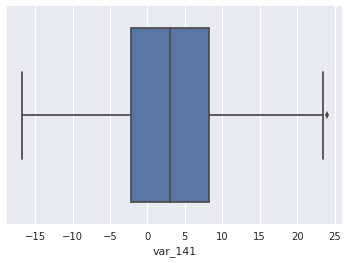

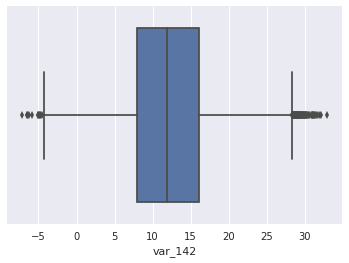

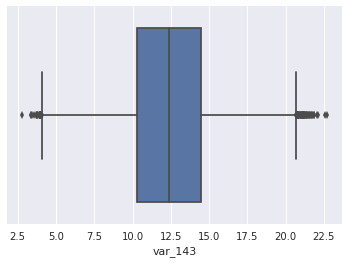

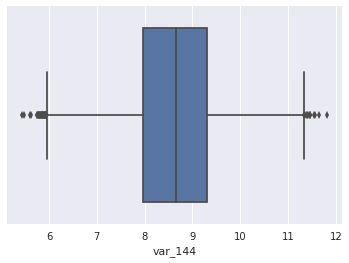

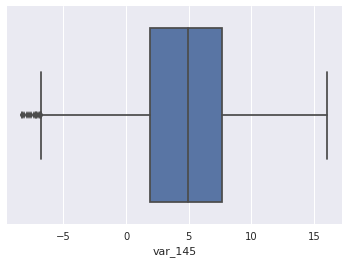

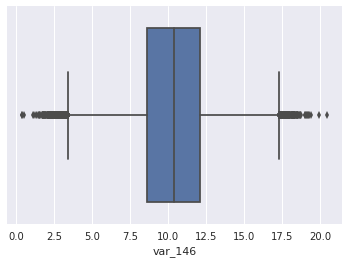

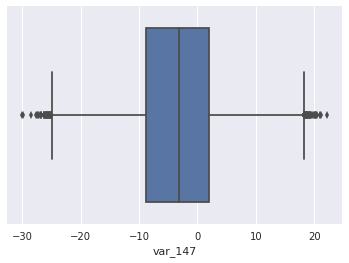

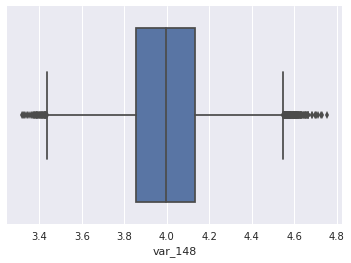

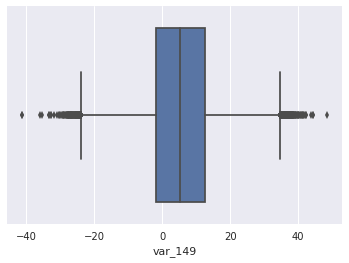

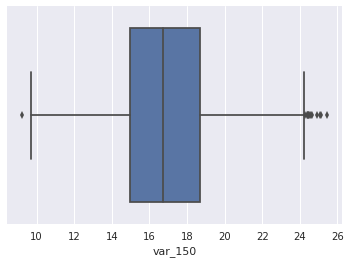

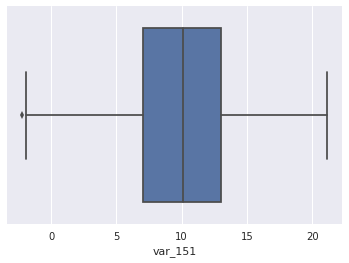

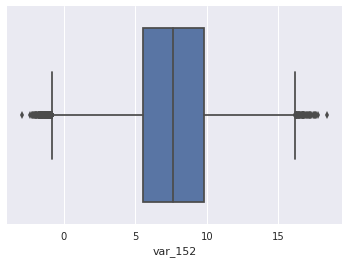

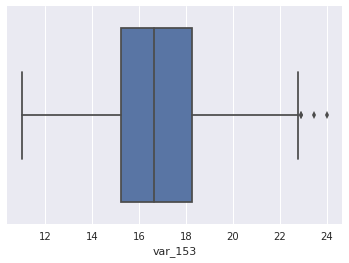

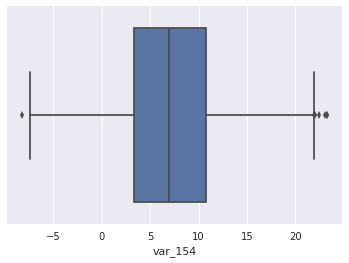

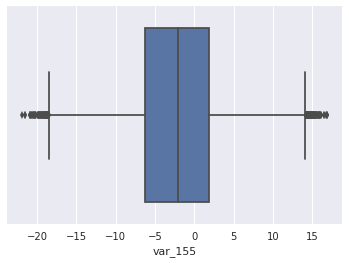

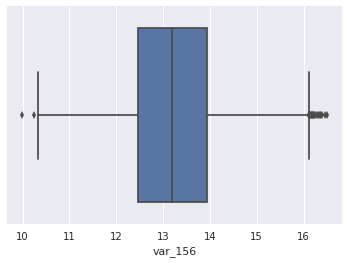

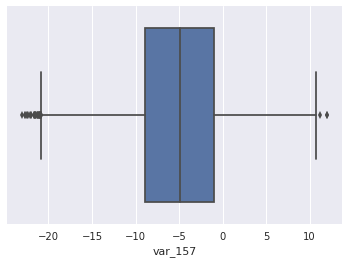

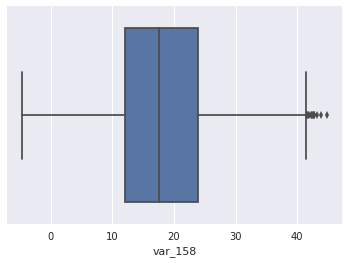

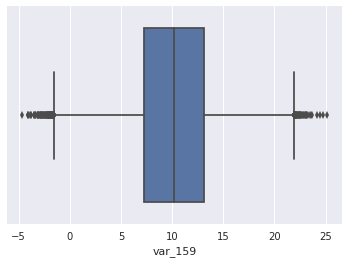

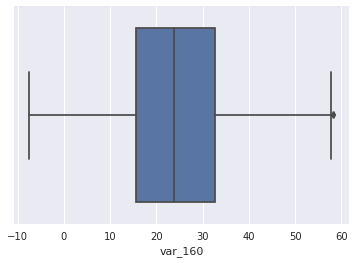

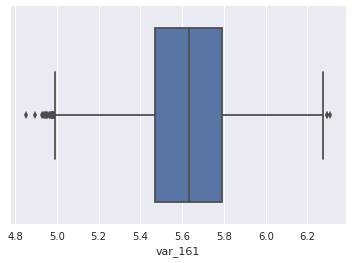

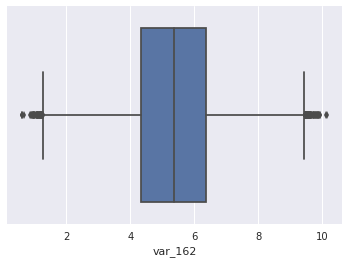

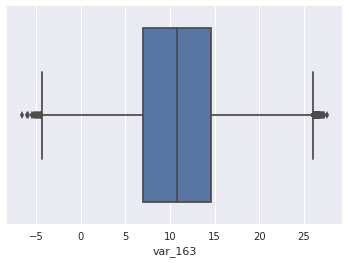

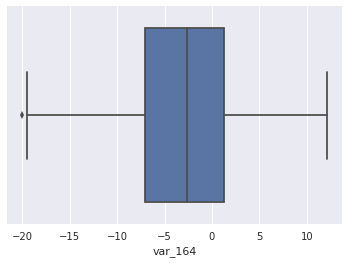

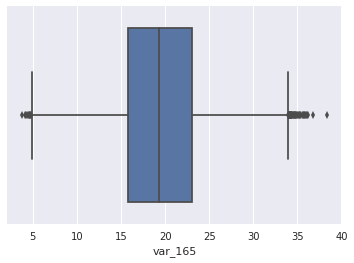

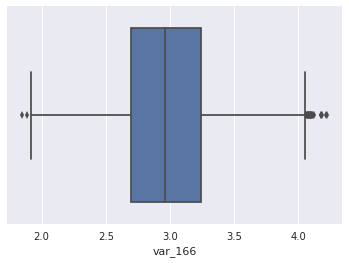

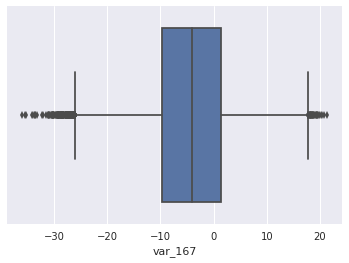

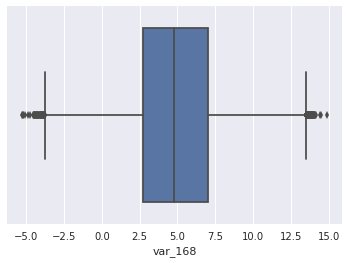

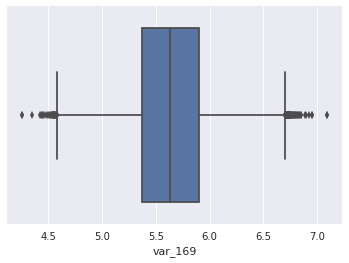

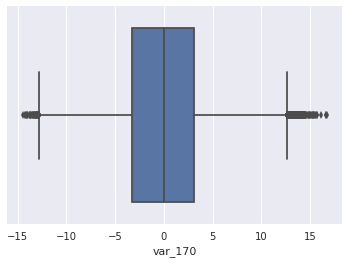

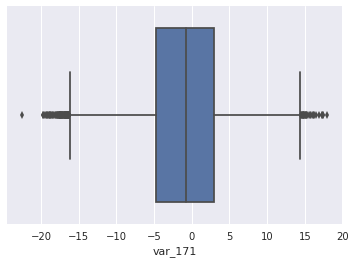

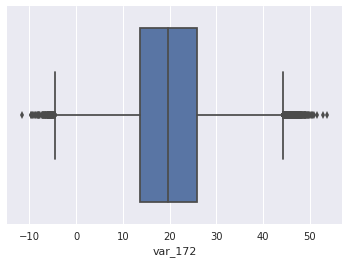

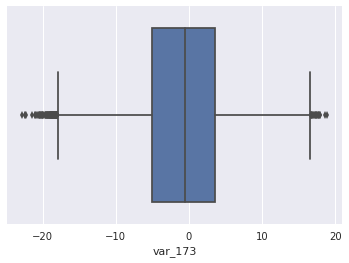

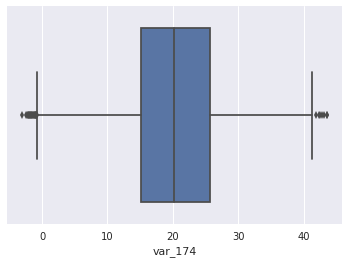

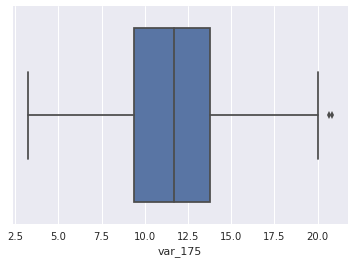

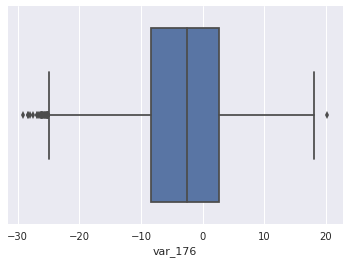

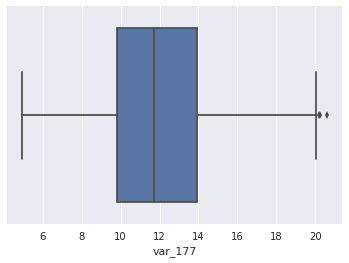

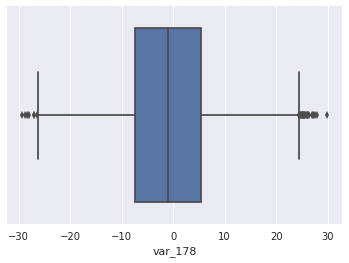

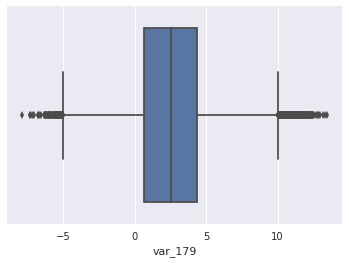

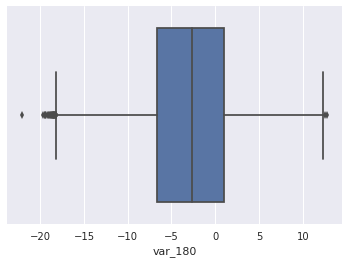

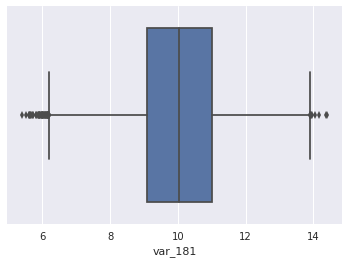

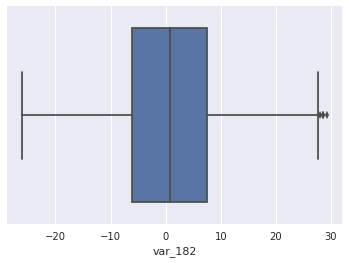

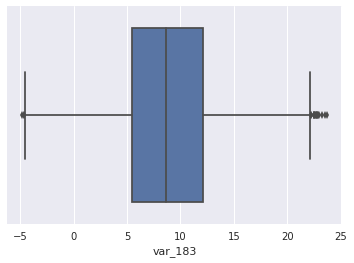

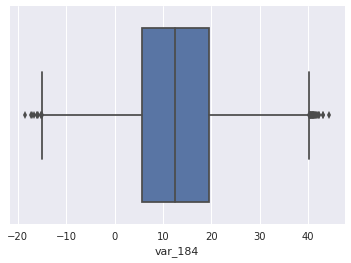

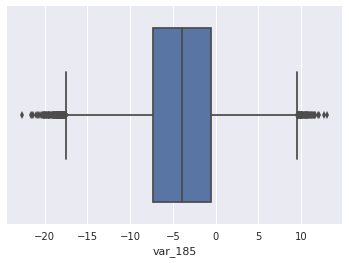

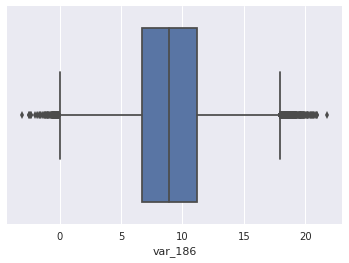

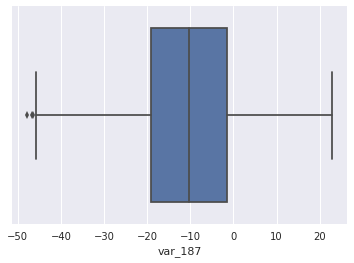

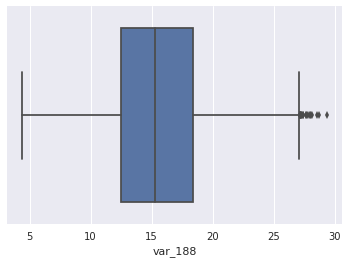

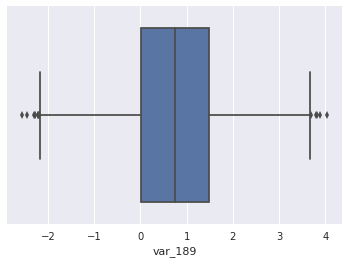

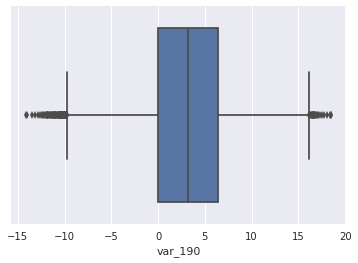

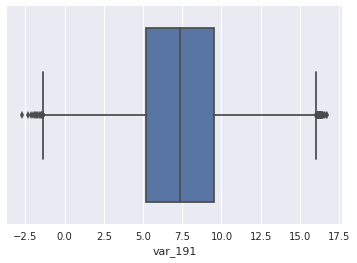

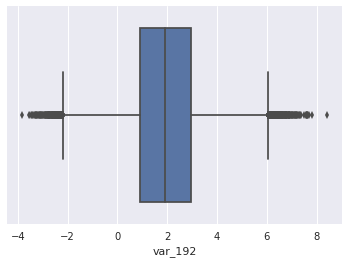

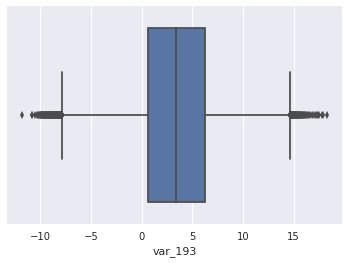

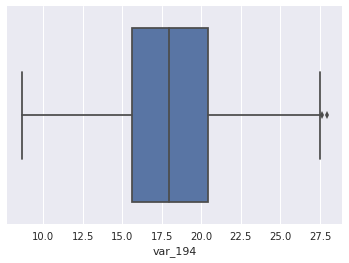

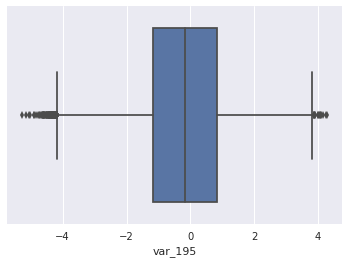

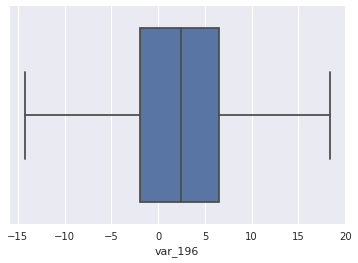

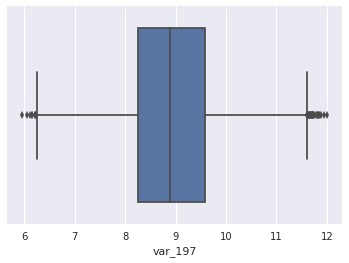

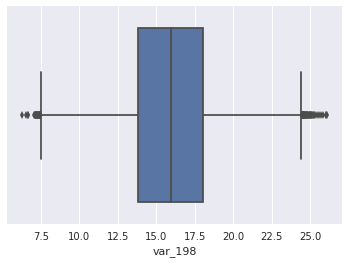

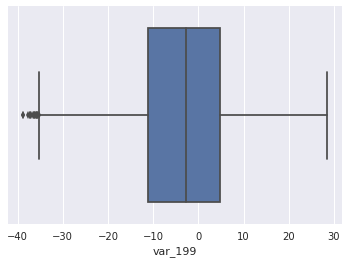

In [10]:
for i in df_train_custom.columns:
    ax = sns.boxplot(x=df_train_custom[i])
    plt.xlabel(i)
    plt.show()

In [11]:
##uncomment this section of code if you want outliers to be removed

# # columns = df_train.columns

# for i in tqdm(reversed(range(202))):
# #     print( df_train.columns[i])
    
#     if(df_train.columns[i] ==  "target" or df_train.columns[i] == "ID_code" ):
#         print(i)
#     else:  
#         print("operating on {}".format(df_train.columns[i]))
#         q75,q25 = np.percentile(df_train.loc[:,df_train.columns[i]],[75,25])
#         iqr = q75-q25
#         print(i)
#         min = q25 - (iqr*1.5)
#         max = q75 + (iqr*1.5)

#         print(df_train.shape)
#         df_train = df_train[~(df_train[df_train.columns[i]] < min)]
#         df_train = df_train[~(df_train[df_train.columns[i]] > max)]

#     df =df.drop(df[df.loc[:,i] < min].index)
#     df = df.drop(df[df.loc[:,i] > max].index)
   

In [12]:
#getting shape of df_train
df_train.shape

(200000, 202)

In [13]:
# df_train.to_csv(r'df_train_removed_outlier.csv',index=False)

In [14]:
# df_train = pd.read_csv('df_train_removed_outlier.csv')

0    179902
1     20098
Name: target, dtype: int64


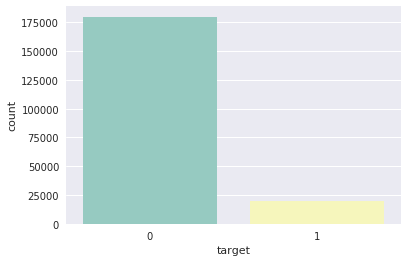

In [15]:
#checking for class labels and class label distribution
sns.countplot(df_train['target'], palette='Set3')
print(df_train['target'].value_counts())
plt.show()

<h4>As from the diagram we can see that the data is highly imbalanced </h4>
<p>
we have several ways to tackle the imbalanced dataset like
</p>
<li>Oversampling</li>
<li>Undersampling</li>
<li>Or we can use hyperparameter tunning to tune the model</li>

<p>We have huge amount of data so we cannot o for oversampling hence we can undersample the data to make our model training faster 
</p>


<br>
<br>
<h3>Selection of performance metrics</h3>
<p>we cannot use accuracy because a random or a dumb model which returns 1 almost all the times can also have 90% accuracy if all the queries which are made includes 90% of class 1 input varibles
<p>As this is classification problem with imbalanced dataset we will be using confusion metrics,precision,recall,Roc and auc curve 
</p>

<h4>Univariate Analysis</h4>

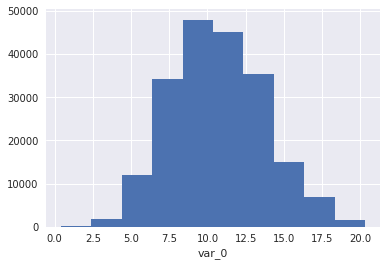

In [16]:
#Now we will check the distributions of different variables

# ax = sns.distplot(df['temp'])
ax = plt.hist(df_train['var_0'])
plt.xlabel('var_0')
plt.show()

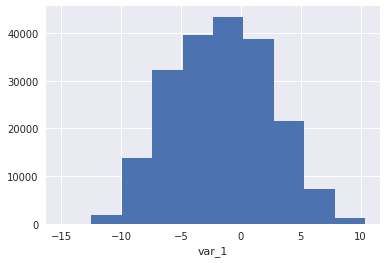

In [17]:
# ax = sns.distplot(df['temp'])
ax = plt.hist(df_train['var_1'])
plt.xlabel('var_1')
plt.show()

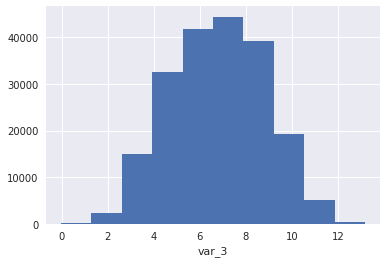

In [18]:
# ax = sns.distplot(df['temp'])
ax = plt.hist(df_train['var_3'])
plt.xlabel('var_3')
plt.show()

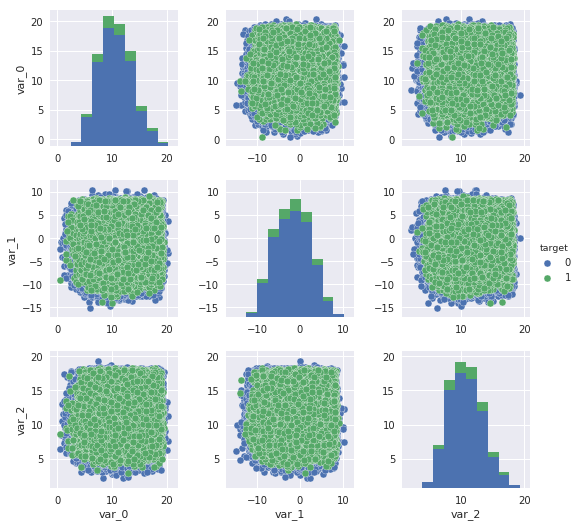

In [19]:
#plotting pairplots,to get insights of data
g = sns.pairplot(df_train,hue="target", vars=["var_0", "var_1","var_2"])
plt.show()

In [20]:
#getting some statistical information of all the coulumn
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


<h4> Feature Correlation</h4>


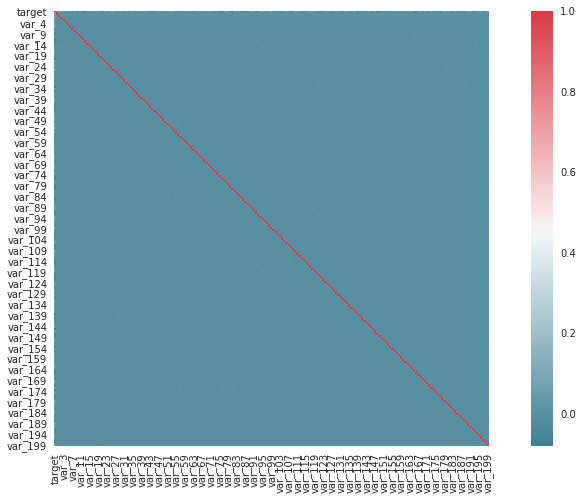

In [21]:
"""
Also displaying correlation plot to detect the collinearity in data 
"""
f, ax = plt.subplots(figsize=(15, 8))
corr =df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

<h4>Multicollinearity detection</h4>
As from this correlation plot we can say that collinarity beteen variables are very small and hence correlation is not our problem.Let's check for multicollinearity

<p>For multicollinearity we can check for VIF (variable inflation factor)<p>

In [22]:
##Uncomment this section of code if you want to calculate VIF for all the variables and save it to dataframe

vif = pd.DataFrame()
df_train_custom = df_train.drop(["target","ID_code"],axis=1)
df_train_custom.head()
vif["VIF Factor"] = [variance_inflation_factor(df_train_custom.values, i) for i in range(df_train_custom.shape[1])]

vif["features"] = df_train_custom.columns

In [23]:
vif.head(200)

,VIF Factor,features
0,13.361739,var_0
1,1.163184,var_1
2,17.491984,var_2
3,12.074464,var_3
4,47.622268,var_4
5,1.416473,var_5
6,40.017336,var_6
7,24.452028,var_7
8,1.008255,var_8
9,38.588253,var_9


As from the above data we can see we don't have huge multicollinearirt between variables that we have randomly selected

<h4>Feature scaling</h4>
<p>As we will go from basic to advance model we will first use logistic regression and we know logistic regression 
is distance based method we will use scale our feature </p>

In [24]:
##Scaling features as we will use distance base model also like Logistic regression
df_train_custom = df_train.drop(["target","ID_code"],axis=1)
df_train_custom = StandardScaler().fit_transform(df_train_custom)
df_train_custom = pd.DataFrame(df_train_custom)
df_train_custom = df_train[['ID_code','target']].join(df_train_custom)


                               
                               



In [25]:
df_train_custom.head()

,ID_code,target,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,train_0,0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,train_1,0,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,train_2,0,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,train_3,0,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,train_4,0,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


<h4>Feature Importance</h4>

In [26]:
##Getting feature importance to get insights of some features
##Running random forest with gridseacrhcv for hyperparameter tunning
parameters = {'min_samples_leaf': [20, 25]}
forest = RandomForestClassifier(max_depth=15, n_estimators=15)
grid = GridSearchCV(forest, parameters, cv=3, n_jobs=-1, verbose=2, scoring=make_scorer(roc_auc_score))

In [27]:
grid.fit(df_train.drop(["target","ID_code"], axis=1).values, df_train.target.values)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] min_samples_leaf=20 .............................................
[CV] min_samples_leaf=20 .............................................
[CV] min_samples_leaf=20 .............................................
[CV] min_samples_leaf=25 .............................................
[CV] .............................. min_samples_leaf=20, total= 1.2min
[CV] min_samples_leaf=25 .............................................
[CV] .............................. min_samples_leaf=20, total= 1.2min
[CV] min_samples_leaf=25 .............................................
[CV] .............................. min_samples_leaf=20, total= 1.2min


[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.2min remaining:  1.2min


[CV] .............................. min_samples_leaf=25, total= 1.2min
[CV] .............................. min_samples_leaf=25, total=  48.2s
[CV] .............................. min_samples_leaf=25, total=  47.4s


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [20, 25]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=2)

In [28]:
grid.best_score_

0.50002487908643078

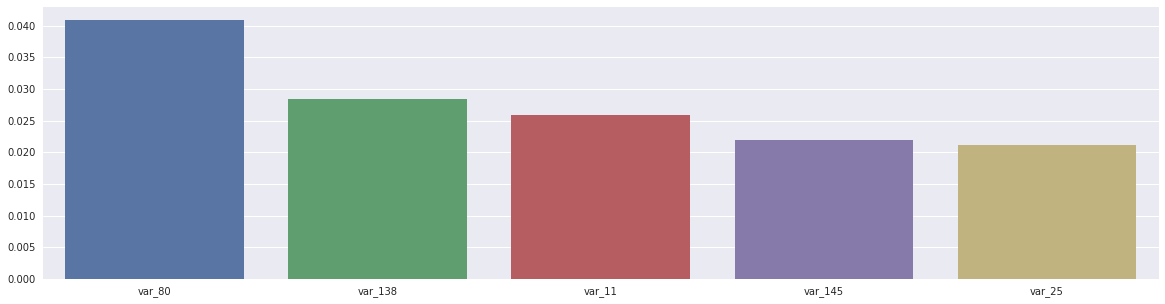

In [29]:

##Displaying important features
n_top = 5
importances = grid.best_estimator_.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = df_train.drop("target", axis=1).columns.values

plt.figure(figsize=(20,5))
sns.barplot(x=feature_names[idx], y=importances[idx]);
plt.show()
# plt.title("What are the top important features to start with?");

In [30]:
# fig, ax = plt.subplots(n_top,2,figsize=(20,5*n_top))

# for n in range(n_top):
#     sns.distplot(train.loc[train.target==0, feature_names[idx][n]], ax=ax[n,0], color="Orange", norm_hist=True)
#     sns.distplot(train.loc[train.target==1, feature_names[idx][n]], ax=ax[n,0], color="Red", norm_hist=True)
#     sns.distplot(test.loc[:, feature_names[idx][n]], ax=ax[n,1], color="Mediumseagreen", norm_hist=True)
#     ax[n,0].set_title("Train {}".format(feature_names[idx][n]))
#     ax[n,1].set_title("Test {}".format(feature_names[idx][n]))
#     ax[n,0].set_xlabel("")
#     ax[n,1].set_xlabel("")
    


In [31]:
##Splitting data in to test and train with 70:30 ratio
train, test = train_test_split(df_train_custom, test_size=0.3)

In [32]:
train.shape

(140000, 202)

In [33]:
test.shape

(60000, 202)

In [34]:
#dropping target and id code to make data suitable for feeding in model
x_train = train.drop(["target","ID_code"],axis=1)
x_test = test.drop(["target","ID_code"],axis=1)

y_train = train[['target']]
y_test = test[['target']]

In [35]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [36]:
##Running Logistic regression with diff values of alpha for  hyperparameter tunning
alpha = [10 ** x for x in range(-5, 2)] #saving alpha in array and looping model with each alpha
tr_scores = []
cv_scores = []
# y_train_predict
# y_test_predict
for i in alpha:
        lr = LogisticRegression(penalty='l2',C=i,class_weight='balanced')
        lr.fit(x_train,y_train)
        y_train_predict  = lr.predict_proba(x_train)
        y_test_predict  =  lr.predict_proba(x_test)
        print(y_train_predict.shape)
        print(y_train.shape)
        tr_scores.append(roc_auc_score(y_train,np.argmax(y_train_predict,axis=1)))
        cv_scores.append(roc_auc_score(y_test,np.argmax(y_test_predict,axis=1)))
        
        
        

(140000, 2)
(140000, 1)
(140000, 2)
(140000, 1)
(140000, 2)
(140000, 1)
(140000, 2)
(140000, 1)
(140000, 2)
(140000, 1)
(140000, 2)
(140000, 1)
(140000, 2)
(140000, 1)


In [37]:
optimal = alpha[cv_scores.index(np.max(cv_scores))] ##getting optimal alpha from arrays of alpha


0.781967254223
0.77817565891


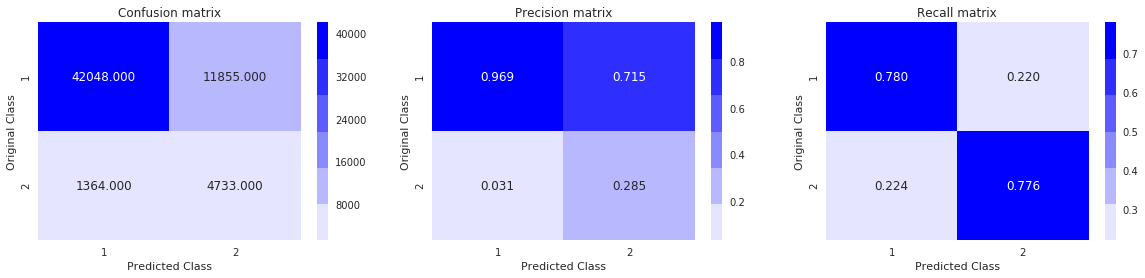

In [38]:
##Running Logistic regression on optimal alpha
lr = LogisticRegression(penalty='l2',C=optimal,class_weight='balanced')
lr.fit(x_train,y_train)
y_train_predict  = lr.predict_proba(x_train)
y_test_predict  =  lr.predict_proba(x_test)
#         print(y_train_predict.shape)
#         print(y_train.shape)
print(roc_auc_score(y_train,np.argmax(y_train_predict,axis=1)))
print(roc_auc_score(y_test,np.argmax(y_test_predict,axis=1)))
##printing confusion matrix,precsion, recall matrix and roc_auc score
plot_confusion_matrix(y_test, np.argmax(y_test_predict,axis=1))
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_test_predict,axis=1))

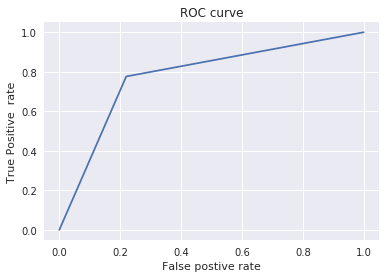

In [39]:
##plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel("False postive rate")
plt.ylabel("True Positive  rate")
plt.title("ROC curve")
plt.show()

In [40]:
train,test = train_test_split(df_train, test_size=0.3)
x_train =  train.drop(["target","ID_code"],axis=1)
y_train = train[['target']]

x_test =  test.drop(["target","ID_code"],axis=1)
y_test = test[['target']]



In [41]:
x_train.shape

(140000, 200)

In [42]:
x_test.shape

(60000, 200)

0.605970548533
0.595584933966


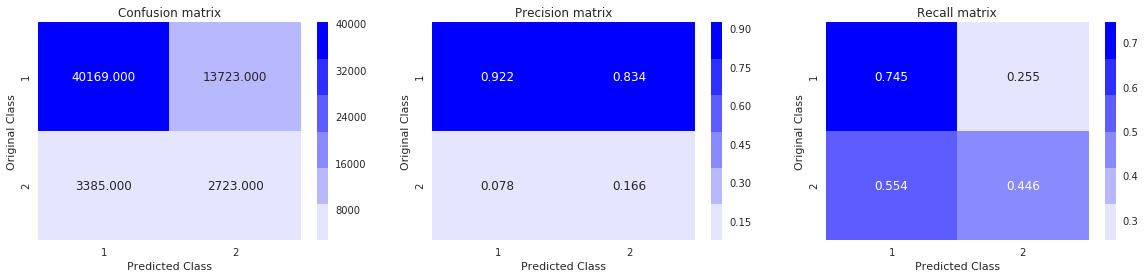

In [43]:
# Creating the hyperparameter grid   and running decision tree with gridsearchcv for hyperparamter tunning
param_dist = {"max_depth": [3,4,5], 
              "criterion": ["entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier(class_weight='balanced') 
  

tree_cv = GridSearchCV(tree, param_dist) 
  
tree_cv.fit(x_train, y_train)
y_train_predict = tree_cv.predict_proba(x_train)
y_test_predict = tree_cv.predict_proba(x_test)
##printing confusion matrix,precsion, recall matrix and roc_auc score
print(roc_auc_score(y_train,np.argmax(y_train_predict,axis=1)))
print(roc_auc_score(y_test,np.argmax(y_test_predict,axis=1)))
plot_confusion_matrix(y_test, np.argmax(y_test_predict,axis=1))
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_test_predict,axis=1))


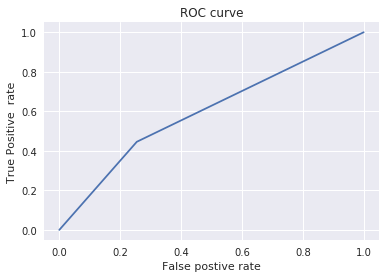

In [44]:
##plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel("False postive rate")
plt.ylabel("True Positive  rate")
plt.title("ROC curve")
plt.show()

0.886945298996
0.715983593469


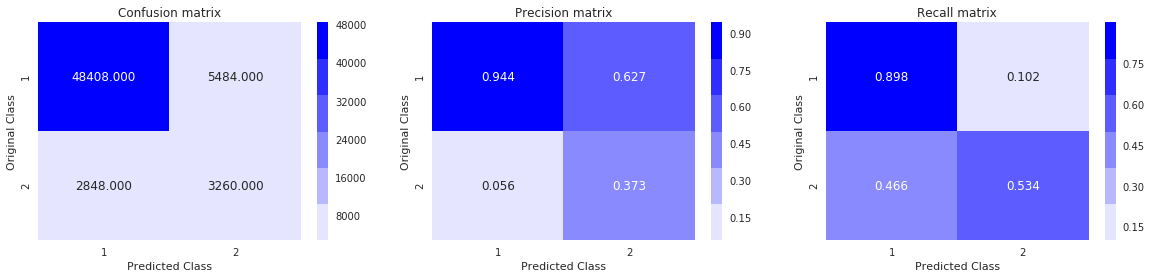

In [45]:
### Creating the hyperparameter grid   and running Random forest  with gridsearchcv for hyperparamter tunning
parameters = {'min_samples_leaf': [100,200],'max_depth': [100], 'bootstrap': [True]}
forest = RandomForestClassifier(max_depth=15, n_estimators=100,class_weight="balanced")
grid = GridSearchCV(forest, parameters, n_jobs=-1)
grid.fit(x_train,y_train)
y_train_predict = grid.predict_proba(x_train)
y_test_predict = grid.predict_proba(x_test)
##printing confusion matrix,precsion, recall matrix and roc_auc score
print(roc_auc_score(y_train,np.argmax(y_train_predict,axis=1)))
print(roc_auc_score(y_test,np.argmax(y_test_predict,axis=1)))
plot_confusion_matrix(y_test, np.argmax(y_test_predict,axis=1))
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(y_test_predict,axis=1))

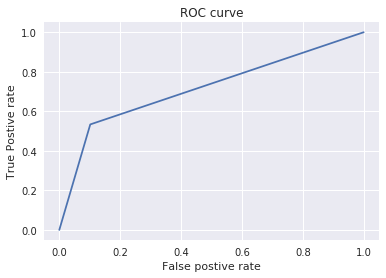

In [46]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel("False postive rate")
plt.ylabel("True Postive rate")
plt.title("ROC curve")
plt.show()

In [47]:
##reading test data
df_test =  pd.read_csv("test.csv");

In [48]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [49]:
#DROPPING ID_code for predicting
df_test =  df_test.drop(["ID_code"],axis=1)

In [50]:
####################################TAKE AWAY FROM DIFFERNT MODELS####################################
#1.From all the models that we have logistic regression was having better auc_roc score
#2.From all the models that we have tried logistic regression was having better precision and recall
#3.From all the models that we have tried logistic regression was having better speed so we would accept logistic 
#regression for use on production enviroment
#######################################################################################################

In [51]:
lr = LogisticRegression(penalty='l2',C=optimal,class_weight='balanced')
lr.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [52]:
predict = lr.predict_proba(df_test)